# Social Networks - Strength of Ties

Social networks usually have persons as nodes, edges model relations between people, like friendship, communication, a similarity in video streaming behavior, etc.

Social networks result in characteristic types of network structure, which influence social processes, including the following:
* Finding job opportunities
* The spread of ideas
* The spread of disease
* Health behaviors

In [179]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

We will work with two sample networks.

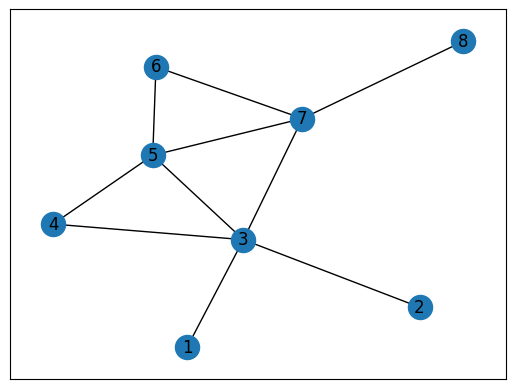

In [180]:
G1 = nx.Graph()
G1.add_edges_from([(1,3),(2,3),(3,4),(3,5),(4,5),(5,6),(5,7),(6,7),(7,8),(7,3)])
G1_pos = nx.spring_layout(G1, k=0.3)
nx.draw_networkx(G1, G1_pos)

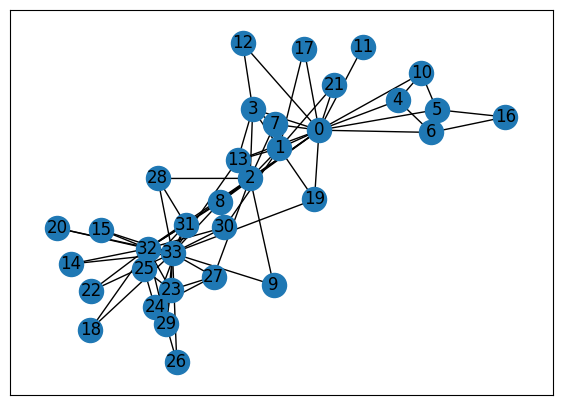

In [181]:
G2 = nx.karate_club_graph()
G2_pos = nx.spring_layout(G2, k=0.2)
plt.figure(figsize=(7,5))
nx.draw_networkx(G2, G2_pos)

In [182]:
# Annotate with splinter club label
member_club = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
               0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
               1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
               1, 1, 1, 1]
nx.set_node_attributes(G2, dict(enumerate(member_club)), 'club')
# Find internal and external edges
internal = [(v, w) for v, w in G2.edges
            if G2.nodes[v]['club'] == G2.nodes[w]['club']]
external = [(v, w) for v, w in G2.edges
            if G2.nodes[v]['club'] != G2.nodes[w]['club']]

Draw the network with nodes of two colors according to the membership in the split clubs.

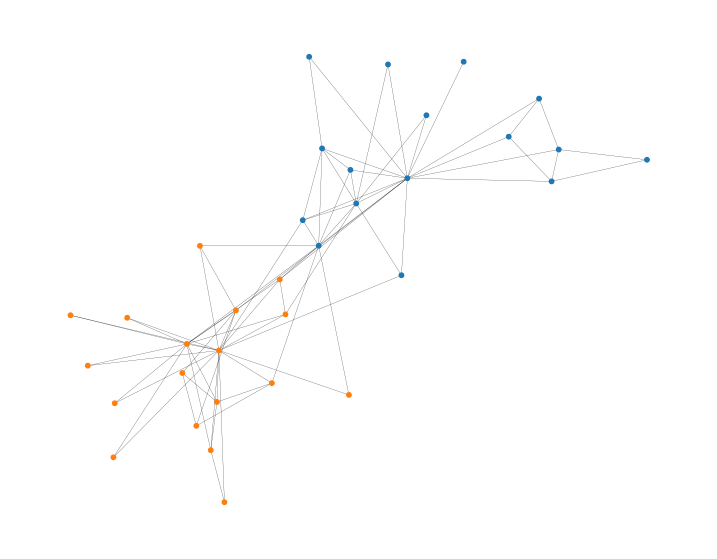

In [183]:
# YOUR CODE HERE
fig, ax = plt.subplots(figsize=(9, 7))
ax.axis("off")
node_colors = ['C1' if v[1]['club'] else 'C0' for v in G2.nodes(data=True)]
nx.draw_networkx(G2, pos=G2_pos, ax=ax, node_size=10, with_labels=False, width=0.15, node_color=node_color)


## Strong and weak ties

A notion from sociology. Strong ties create communities, weak ties connect different communities.

According to the definition of community, persons within the same community are more likely to have
common friends than those in different communities. So, let us measure the strength of a tie.

We can measure the strength of a tie as

$$\hspace{5em} (\text{the number of common friends} + 1).$$

In [184]:
# Implenment the following function
def tie_strength1(G, v, w):
    """Get the strength of the tie between nodes v and w 
    as (the number of their common friends + 1)
    """
    # YOUR CODE HERE
    return len(list(nx.common_neighbors(G, v, w))) + 1

In [185]:
assert tie_strength1(G1, 1, 3) == 1
assert tie_strength1(G1, 3, 5) == 3
assert tie_strength1(G1, 5, 3) == 3
assert tie_strength1(G1, 5, 4) == 2
G1_strength1 = dict(
    ((v,w), tie_strength1(G1, v, w)) for v, w in G1.edges()
)
G1_strength1

{(1, 3): 1,
 (3, 2): 1,
 (3, 4): 2,
 (3, 5): 3,
 (3, 7): 2,
 (4, 5): 2,
 (5, 6): 2,
 (5, 7): 3,
 (6, 7): 2,
 (7, 8): 1}

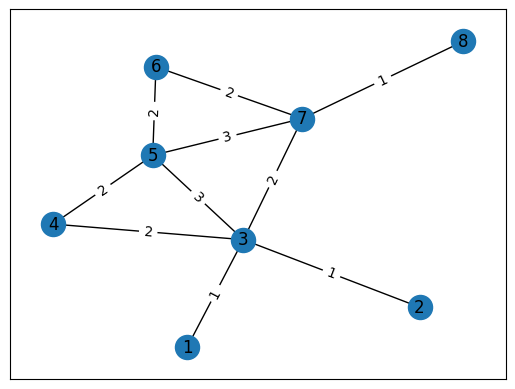

In [186]:
nx.draw_networkx(G1, G1_pos)
_ = nx.draw_networkx_edge_labels(G1, G1_pos, edge_labels=G1_strength1)

In [187]:
G2_strength1 = dict(
    ((v,w), tie_strength1(G2, v, w)) for v, w in G2.edges()
)
print(G2_strength1)

{(0, 1): 8, (0, 2): 6, (0, 3): 6, (0, 4): 3, (0, 5): 3, (0, 6): 3, (0, 7): 4, (0, 8): 2, (0, 10): 3, (0, 11): 1, (0, 12): 2, (0, 13): 4, (0, 17): 2, (0, 19): 2, (0, 21): 2, (0, 31): 1, (1, 2): 5, (1, 3): 5, (1, 7): 4, (1, 13): 4, (1, 17): 2, (1, 19): 2, (1, 21): 2, (1, 30): 1, (2, 3): 5, (2, 7): 4, (2, 8): 3, (2, 9): 1, (2, 13): 4, (2, 27): 1, (2, 28): 1, (2, 32): 2, (3, 7): 4, (3, 12): 2, (3, 13): 4, (4, 6): 2, (4, 10): 2, (5, 6): 3, (5, 10): 2, (5, 16): 2, (6, 16): 2, (8, 30): 3, (8, 32): 4, (8, 33): 3, (9, 33): 1, (13, 33): 1, (14, 32): 2, (14, 33): 2, (15, 32): 2, (15, 33): 2, (18, 32): 2, (18, 33): 2, (19, 33): 1, (20, 32): 2, (20, 33): 2, (22, 32): 2, (22, 33): 2, (23, 25): 1, (23, 27): 2, (23, 29): 3, (23, 32): 3, (23, 33): 4, (24, 25): 2, (24, 27): 1, (24, 31): 2, (25, 31): 2, (26, 29): 2, (26, 33): 2, (27, 33): 2, (28, 31): 2, (28, 33): 2, (29, 32): 3, (29, 33): 4, (30, 32): 3, (30, 33): 3, (31, 32): 2, (31, 33): 3, (32, 33): 11}


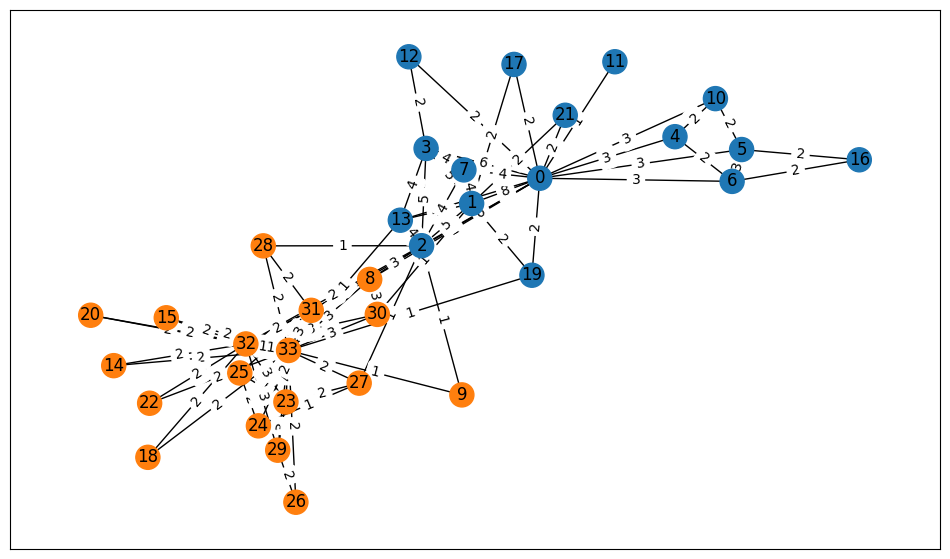

In [188]:
plt.figure(figsize=(12,7))
nx.draw_networkx(G2, G2_pos, node_color=node_colors)
_ = nx.draw_networkx_edge_labels(G2, G2_pos, edge_labels=G2_strength1)

### Neighborhood overlap

From the lecture "the larger the overlap, the stronger is the tie".

$$\hspace{5em}overlap(u,v)=\frac{\text{the number of shared friends of both } u \text{ and }v }{\text{the number of friends who are adjacent to } u \text{ or } v}$$

In [189]:
def overlap(G,u,v):
    # return overlap(u,v)
    shared_friends = len(list(nx.common_neighbors(G, u, v)))
    adjacent_friends = len(set(G.neighbors(u)).union(set(G.neighbors(v)))) - (2 if v in G.neighbors(u) else 0)
    return shared_friends / adjacent_friends

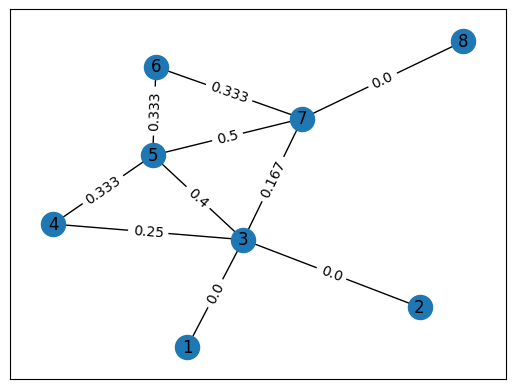

In [190]:
assert round(overlap(G1, 2, 3),3) == 0.0
assert round(overlap(G1, 5, 4),3) == 0.333
assert round(overlap(G1, 3, 7),3) == 0.167

G1_strength2 = dict(
    ((v,w), round(overlap(G1, v, w),3)) for v, w in G1.edges()
)
nx.draw_networkx(G1, G1_pos)
_ = nx.draw_networkx_edge_labels(G1, G1_pos, edge_labels=G1_strength2)

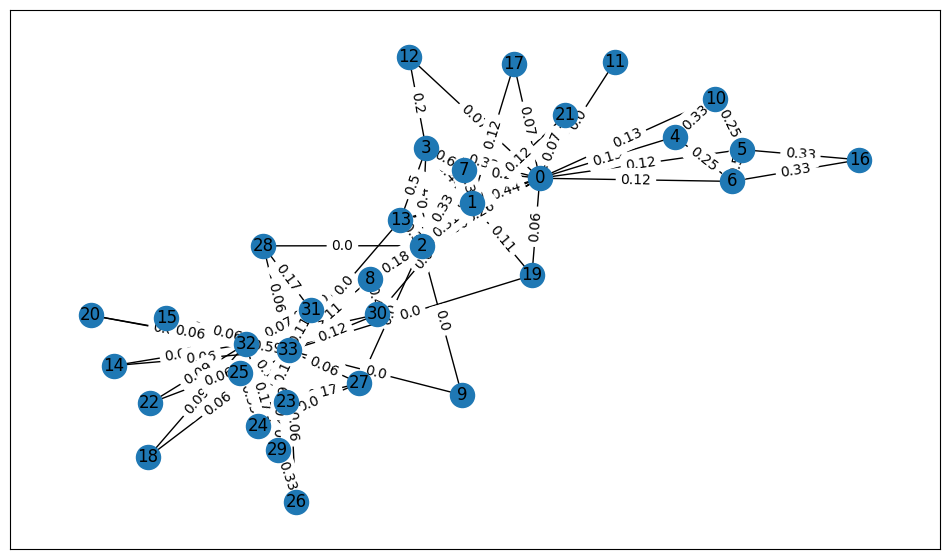

In [191]:
G2_strength2 = dict(
    ((v,w), round(overlap(G2, v, w),2)) for v, w in G2.edges()
)
plt.figure(figsize=(12,7))
nx.draw_networkx(G2, G2_pos)
_ = nx.draw_networkx_edge_labels(G2, G2_pos, edge_labels=G2_strength2)

## Bridge Span

An edge is a **bridge** if its removal results in **disconnection** of its terminal nodes. Are there any bridges within the two networks?

In [192]:
G1_bridges = nx.bridges(G1)
G2_bridges = nx.bridges(G2)
G1_bridges = list(G1_bridges)
G2_bridges = list(G2_bridges)
print(G1_bridges)
print(G2_bridges)

[(1, 3), (3, 2), (7, 8)]
[(0, 11)]


In [193]:
assert G1_bridges == [(1, 3), (3, 2), (7, 8)]
assert G2_bridges == [(0, 11)]

Bridges are rare in real social networks. If we consider an edge as a 'shortcut', we can measure the increase in the distance between the endpoints of an edge when we remove the edge. Nodes connected by an edge are always distance 1 apart (in an unweighted
network). But if that edge is removed, its endpoints could be anywhere from distance 2
apart to entirely disconnected. This concept is captured by the **bridge span**, the network
distance between an edge's endpoints if that edge is removed. Edges with large spans
connect distant parts of a network, so they may be considered weak ties despite playing an
important role.

In [194]:
def span(G,u,v):
    # return the distance between nodes u and v of the network G 
    # when the edge {u,v} is removed from the network;
    # if an edge does not connect the nodes u and v in G, raise an exception
    # otherwise, if there is no path between u and v, after removing the 
    # edge (u,v), return -1
    if (u,v) not in G.edges:
        raise Exception("Edge does not exist")
    edge_data = dict(G.get_edge_data(u,v))
    G.remove_edge(u,v)
    if nx.has_path(G, u, v):
        value = nx.shortest_path_length(G, u, v)
    else:
        value = -1
    G.add_edge(u,v)
    nx.set_edge_attributes(G, {(u,v): edge_data })
    return value

In [195]:
# test whether an exception is raised when the nodes are not connected 
# by an edge in the original network
try: 
    span(G1, 1, 4)
except:
    pass
else:
    raise AssertionError("Did not raise an exception")

In [196]:
assert span(G1, 1, 3) == -1
assert span(G1, 4, 3) == 2
assert span(G1, 6, 7) == 2
assert span(G1, 7, 8) == -1
G1_strength3  = dict(
    ((v,w), span(G1, v, w)) for v, w in G1.edges()
)
print(list(G1.edges()))
G1_strength3

[(1, 3), (3, 2), (3, 5), (3, 7), (3, 4), (4, 5), (5, 6), (5, 7), (6, 7), (7, 8)]


{(1, 3): -1,
 (3, 2): -1,
 (3, 5): 2,
 (3, 7): 2,
 (3, 4): 2,
 (4, 5): 2,
 (5, 6): 2,
 (5, 7): 2,
 (6, 7): 2,
 (7, 8): -1}

In [197]:
G2_strength3  = dict(
    ((v,w), span(G2, v, w)) for v, w in G2.edges()
)
G2_strength3

{(0, 1): 2,
 (0, 2): 2,
 (0, 3): 2,
 (0, 4): 2,
 (0, 5): 2,
 (0, 6): 2,
 (0, 7): 2,
 (0, 8): 2,
 (0, 10): 2,
 (0, 11): -1,
 (0, 12): 2,
 (0, 13): 2,
 (0, 17): 2,
 (0, 19): 2,
 (0, 21): 2,
 (0, 31): 3,
 (1, 2): 2,
 (1, 3): 2,
 (1, 7): 2,
 (1, 13): 2,
 (1, 17): 2,
 (1, 19): 2,
 (1, 21): 2,
 (1, 30): 3,
 (2, 3): 2,
 (2, 7): 2,
 (2, 8): 2,
 (2, 9): 3,
 (2, 13): 2,
 (2, 27): 3,
 (2, 28): 3,
 (2, 32): 2,
 (3, 7): 2,
 (3, 12): 2,
 (3, 13): 2,
 (4, 6): 2,
 (4, 10): 2,
 (5, 6): 2,
 (5, 10): 2,
 (5, 16): 2,
 (6, 16): 2,
 (8, 30): 2,
 (8, 32): 2,
 (8, 33): 2,
 (9, 33): 3,
 (13, 33): 3,
 (14, 32): 2,
 (14, 33): 2,
 (15, 32): 2,
 (15, 33): 2,
 (18, 32): 2,
 (18, 33): 2,
 (19, 33): 3,
 (20, 32): 2,
 (20, 33): 2,
 (22, 32): 2,
 (22, 33): 2,
 (23, 25): 3,
 (23, 27): 2,
 (23, 29): 2,
 (23, 32): 2,
 (23, 33): 2,
 (24, 25): 2,
 (24, 27): 3,
 (24, 31): 2,
 (25, 31): 2,
 (26, 29): 2,
 (26, 33): 2,
 (27, 33): 2,
 (28, 31): 2,
 (28, 33): 2,
 (29, 32): 2,
 (29, 33): 2,
 (30, 32): 2,
 (30, 33): 2,
 (31, 32): 2

## Comparing different tie strength

For the network `G1`, let us print a table of edges together with the values of `strength1`, `strength2`, and `strength3`.

  1-- 3   1  0.000 -1.000
  3-- 2   1  0.000 -1.000
  3-- 5   3  0.400  2.000
  3-- 7   2  0.167  2.000
  3-- 4   2  0.250  2.000
  4-- 5   2  0.333  2.000
  5-- 6   2  0.333  2.000
  5-- 7   3  0.500  2.000
  6-- 7   2  0.333  2.000
  7-- 8   1  0.000 -1.000


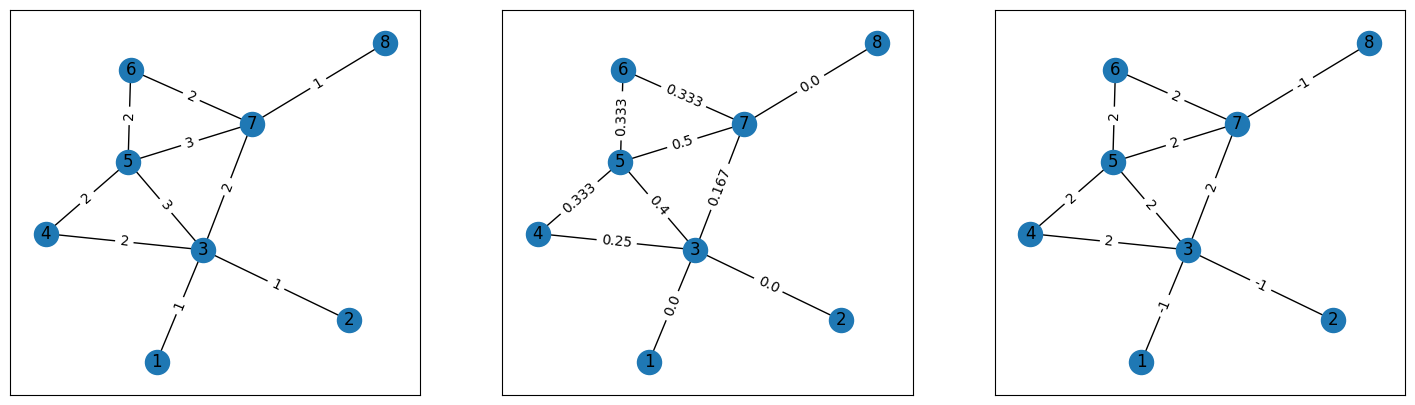

In [198]:
plt.figure(figsize=(18,5))
plt.subplot(131)
nx.draw_networkx(G1, G1_pos)
nx.draw_networkx_edge_labels(G1, G1_pos, edge_labels=G1_strength1)
plt.subplot(132)
nx.draw_networkx(G1, G1_pos)
nx.draw_networkx_edge_labels(G1, G1_pos, edge_labels=G1_strength2)
plt.subplot(133)
nx.draw_networkx(G1, G1_pos)
nx.draw_networkx_edge_labels(G1, G1_pos, edge_labels=G1_strength3)
for (u,v) in G1.edges:
    print('{0:3d}--{1:2d} {2:3d} {3:6.3f} {4:6.3f}'.format(u,v,G1_strength1[(u,v)],G1_strength2[(u,v)],G1_strength3[(u,v)]))

For `G2`, print a table of edges together with the values of `strength1`, `strength2`, and `strength3`. You should obtain something like

![StrengthTableG2.png](StrengthTableG2.png)

In [199]:
edge=[]
strenght1 = []
strenght2 = []
strenght3 = []


for (u,v) in G2.edges:
    edge.append((u,v))
    strenght1.append(tie_strength1(G2, u, v))
    strenght2.append(round(overlap(G2, u, v),2))
    strenght3.append(span(G2, u, v))

#create a table with the results
import pandas as pd
df = pd.DataFrame({'edge':edge,'strenght1':strenght1,'strenght2':strenght2,'strenght3':strenght3})
df = df[['edge','strenght1','strenght2','strenght3']]
df


,edge,strenght1,strenght2,strenght3
0,"(0, 1)",8,0.44,2
1,"(0, 2)",6,0.26,2
2,"(0, 3)",6,0.33,2
3,"(0, 4)",3,0.13,2
4,"(0, 5)",3,0.12,2
...,...,...,...,...
73,"(30, 32)",3,0.17,2
74,"(30, 33)",3,0.12,2
75,"(31, 32)",2,0.07,2
76,"(31, 33)",3,0.11,2


For `G2`, compare the average tie strengths between *internal* or *external* (i.e., inside a club or between clubs after splitting the karate club) edges.  Which of them is better?

In [200]:
for internality in ['internal', 'external']:
    strength1_internality = [G2_strength1[e] for e in eval(internality)]
    print("Mean strength1 (#common friends) of", internality, "edges:", sum(strength1_internality)/len(strength1_internality),"±",
         np.std(strength1_internality))

Mean strength1 (#common friends) of internal edges: 2.926470588235294 ± 1.6207857251290214
Mean strength1 (#common friends) of external edges: 1.4 ± 0.66332495807108


In [201]:
for internality in ['internal', 'external']:
    strength2_internality = [G2_strength2[e] for e in eval(internality)]
    print("Mean strength2 (neighborhood overlap) of", internality, "edges:", sum(strength2_internality)/len(strength2_internality),"±",
         np.std(strength2_internality))

Mean strength2 (neighborhood overlap) of internal edges: 0.1985294117647059 ± 0.1468819524600538
Mean strength2 (neighborhood overlap) of external edges: 0.028999999999999998 ± 0.05485435260760991


In [202]:
for internality in ['internal', 'external']:
    strength3_internality = [G2_strength3[e] for e in eval(internality)]
    print("Mean strength (bridge span) of", internality, "edges:", sum(strength3_internality)/len(strength3_internality),"±",
         np.std(strength3_internality))

Mean strength (bridge span) of internal edges: 2.0 ± 0.42008402520840293
Mean strength (bridge span) of external edges: 2.7 ± 0.45825756949558405


# Facebook Network Analysis

based on a [Networkx guide](https://networkx.org/nx-guides/content/exploratory_notebooks/facebook_notebook.html#betweenness-centrality).

Our data consists of the facebook circles (friends lists) of ten people. The dataset can be found at this link http://snap.stanford.edu/data/ego-Facebook.html. The network is undirected and has no weights. Each node represents an anonymized facebook user that belongs to one of those ten friends lists.
Each edge corresponds to the friendship of two facebook users that belong to this network. The ten original friends are the nodes $0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980$, we will call them the **spotlight nodes**.

In [203]:
# import packages 
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

In [204]:
facebook = pd.read_csv(
    "data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
facebook

,start_node,end_node
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
88229,4026,4030
88230,4027,4031
88231,4027,4032
88232,4027,4038


In [205]:
spotlight_nodes = [0,107,348,414,686,698,1684,1912,3437,3980]

facebook = nx.from_pandas_edgelist(facebook, "start_node", "end_node")

In [206]:
import itertools

for u,v in itertools.combinations(spotlight_nodes, 2):
    #check u, v edge
    if (u,v) in facebook.edges:
        print(f"Span of the edge ({u},{v}): {span(facebook, u,v)}")
    # else:
    #     print(f"Edge ({u},{v}) does not exist")

Span of the edge (0,107): 2
Span of the edge (107,348): 2
Span of the edge (107,414): 2
Span of the edge (107,1684): 2
Span of the edge (348,414): 2
Span of the edge (686,698): 2
Span of the edge (698,3437): 2


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1964ff7e-1f9f-44df-b661-25d7746f2fe7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>